# 2021-08-17 Adapting the framework implementation to the general model formulation for SCPaper

* Went over all of the steps in the "more constrained general formulation" in the SCPaper README, making sure that the implemenation and notation in `sc_senario.py` is in line with these. Removed some old, extraneous stuff. Tested the following runs, confirming that I am getting back the same results as in the 2021-06-01 diary entry:
    * Baseline kinematics, baseline model.
    * Baseline kinematics, baseline model + `oBEv`.
    * Baseline kinematics, baseline model + `oBEo`.
* Implemented `oAI`, and verified:
    * That I am getting back the same results as in the 2021-06-01 diary entry, for:
        * Baseline kinematics, baseline model.
        * Baseline kinematics, baseline model + `oBEv` + `oAI` (giving back same results as before for only `oBEv`, since `oAI` was previously implicit).
    * That when I rerun this last simulation, but now turning `oAI` off, I no longer get the same results as before.
* Refactored away from `V02FALUEFCN`, instead implementing `oVA`, and verified:
    * That I am getting back the same results as in the 2021-06-01 diary entry for baseline kinematics and baseline model + `oVA` (giving back same results as before for pure baseline model, since `oVA` was previously implicit).
    * That when I rerun this last simulation, but now turning `oVA` off, I no longer get the same results as before.
* Modified so that the other agent is no longer assumed to have default parameters, but rather the same parameters as the ego agent. (Required storing value fcn gains for both ctrl types in `self.params`, in a new field `k_all`). Verified that I am getting back the same results as in the 2021-06-01 diary entry, for:
    * Baseline kinematics, baseline model + `oVA`.
    * Baseline kinematics, baseline model + `oBEv` + `oAI`
    

## Summarising the above with some key simulations

Results below are for commit: https://github.com/gmarkkula/COMMOTIONSFramework/commit/e26dff977a951f4bb9eef712c9ae1715b780c56a

(Rerunning the code below for other commits is not guaranteed to give the same results)

Below I am running the key simulations mentioned above (as well as the no-interaction test I have used previously), to show that I get the same results for all of these simulations as in the 2021-06-01 diary entry, as I would expect. 

### Init

In [2]:
# append root folder of repo to PYTHONPATH (https://stackoverflow.com/questions/714063/importing-modules-from-parent-folder)
import sys
from pathlib import Path
sys.path.append(str(Path('.').absolute().parent))
print(sys.path[-1])

# imports needed to run the simulations
import numpy as np
import commotions
import sc_scenario
from sc_scenario import get_assumptions_dict, SCSimulation
from sc_scenario_helper import CtrlType

C:\GITHUB\COMMOTIONSFramework


C:\GITHUB\COMMOTIONSFramework\sc_scenario.py:87: UserWarning: N_ACTIONS set to no of actions in default params, so will not work if non-default params are set.
  warnings.warn('N_ACTIONS set to no of actions in default params, so will not work if non-default params are set.')


### Just the base model, no interaction

As noted further above, I now need to set `oVA` (affordance-based value function) to get the same base model as in the 2021-06-01 diary entry.

C:\GITHUB\COMMOTIONSFramework\sc_scenario.py:200: UserWarning: ****** Setting initial value of i_CONSTANT behaviour activation to arbitrary high value.
  warnings.warn('****** Setting initial value of i_CONSTANT behaviour activation to arbitrary high value.')


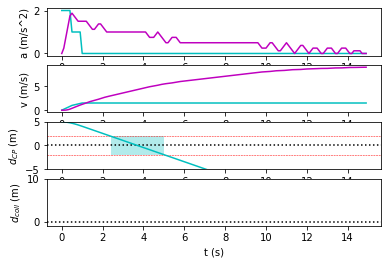

In [8]:
NAMES = ('P', 'V')
CTRL_TYPES = (CtrlType.SPEED, CtrlType.ACCELERATION) 
INITIAL_POSITIONS = np.array([[0,-5], [400, 0]])
GOALS = np.array([[0, 5], [-50, 0]])
SPEEDS = np.array((0, 0))

optional_assumptions = get_assumptions_dict(
        default_value = False, oVA = True, oBEo = False, oBEv = False, oAI = False, oEA = False)
sc_simulation = SCSimulation(
        CTRL_TYPES, GOALS, INITIAL_POSITIONS, initial_speeds = SPEEDS, 
        end_time = 15, optional_assumptions = optional_assumptions,
        agent_names = NAMES)
sc_simulation.run()
sc_simulation.do_plots(kinem_states = True, surplus_action_vals = False)

If I disable `oVA`, I instead get the original, non-affordance-based value functions, which give different behaviour. (I am not confirming here that these results are similar to any historical results though.)

C:\GITHUB\COMMOTIONSFramework\sc_scenario.py:200: UserWarning: ****** Setting initial value of i_CONSTANT behaviour activation to arbitrary high value.
  warnings.warn('****** Setting initial value of i_CONSTANT behaviour activation to arbitrary high value.')


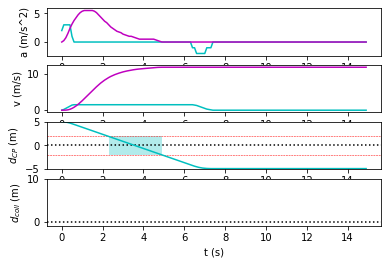

In [9]:
optional_assumptions = get_assumptions_dict(
        default_value = False, oVA = False, oBEo = False, oBEv = False, oAI = False, oEA = False)
sc_simulation = SCSimulation(
        CTRL_TYPES, GOALS, INITIAL_POSITIONS, initial_speeds = SPEEDS, 
        end_time = 15, optional_assumptions = optional_assumptions,
        agent_names = NAMES)
sc_simulation.run()
sc_simulation.do_plots(kinem_states = True, surplus_action_vals = False)

### Baseline kinematics, base model

Now running the baseline kinematics (only the 40 m initial vehicle distance), confirming that I get back the same results as 2021-06-01.

C:\GITHUB\COMMOTIONSFramework\sc_scenario.py:200: UserWarning: ****** Setting initial value of i_CONSTANT behaviour activation to arbitrary high value.
  warnings.warn('****** Setting initial value of i_CONSTANT behaviour activation to arbitrary high value.')


Initial car distance 40 m:


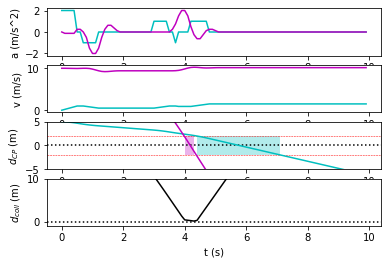

In [11]:
SPEEDS = np.array((0, 10))
PED_Y0 = -5
CONST_ACCS = (None, None)
AFF_VAL_FCN = True
optional_assumptions = get_assumptions_dict(
        default_value = False, oVA = AFF_VAL_FCN, oBEo = False, oBEv = False, oAI = False, oEA = False)
(params, params_k) = sc_scenario.get_default_params(oVA = AFF_VAL_FCN)


def run_baseline_kinematics(plot_beh_probs = False, plot_beh_activs = False,
                           plot_beh_accs = False):
    for dist0 in (40,):
        INITIAL_POSITIONS = np.array([[0, PED_Y0], [dist0, 0]])
        sc_simulation = SCSimulation(
                CTRL_TYPES, GOALS, INITIAL_POSITIONS, initial_speeds = SPEEDS, 
                end_time = 10, optional_assumptions = optional_assumptions,
                agent_names = NAMES, const_accs = CONST_ACCS, params = params)
        sc_simulation.run()
        print('Initial car distance %d m:' % dist0)
        sc_simulation.do_plots(kinem_states = True, beh_probs = plot_beh_probs,
                              beh_activs = plot_beh_activs, beh_accs = plot_beh_accs)


run_baseline_kinematics()

Mostly out of curiosity, here are the corresponding results for the model with original, non-affordance-based value functions:

C:\GITHUB\COMMOTIONSFramework\sc_scenario.py:200: UserWarning: ****** Setting initial value of i_CONSTANT behaviour activation to arbitrary high value.
  warnings.warn('****** Setting initial value of i_CONSTANT behaviour activation to arbitrary high value.')


Initial car distance 40 m:


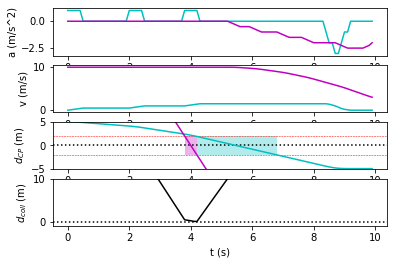

In [12]:
AFF_VAL_FCN = False
optional_assumptions = get_assumptions_dict(
        default_value = False, oVA = AFF_VAL_FCN, oBEo = False, oBEv = False, oAI = False, oEA = False)
(params, params_k) = sc_scenario.get_default_params(oVA = AFF_VAL_FCN)

run_baseline_kinematics()

### Baseline kinematics, model with value-based behaviour estimation

Enabling `oBEv` and `oAI`, I get back the same results as for the 2021-06-01 simulation with just `oBEvs`: 

C:\GITHUB\COMMOTIONSFramework\sc_scenario.py:200: UserWarning: ****** Setting initial value of i_CONSTANT behaviour activation to arbitrary high value.
  warnings.warn('****** Setting initial value of i_CONSTANT behaviour activation to arbitrary high value.')


Initial car distance 40 m:


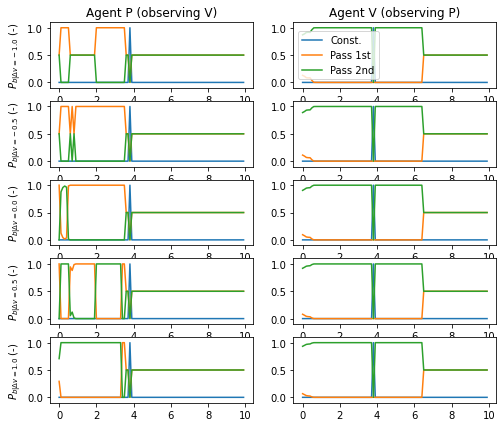

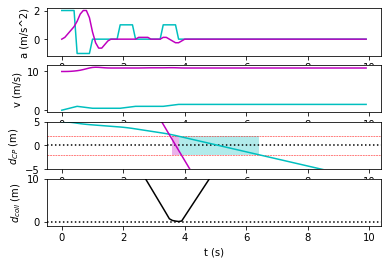

In [14]:
AFF_VAL_FCN = True
optional_assumptions = get_assumptions_dict(
        default_value = False, oVA = AFF_VAL_FCN, oBEo = False, oBEv = True, oAI = True, oEA = False)
(params, params_k) = sc_scenario.get_default_params(oVA = AFF_VAL_FCN)

run_baseline_kinematics(plot_beh_probs = True)

Disabling `oAI` changes the behaviour, interestingly so as to effectively remove the vehicle speed increase that is visible in the simulation above - in line with an interpretation that this speed increase was applied to discourage the pedestrian from crossing: 

C:\GITHUB\COMMOTIONSFramework\sc_scenario.py:200: UserWarning: ****** Setting initial value of i_CONSTANT behaviour activation to arbitrary high value.
  warnings.warn('****** Setting initial value of i_CONSTANT behaviour activation to arbitrary high value.')


Initial car distance 40 m:


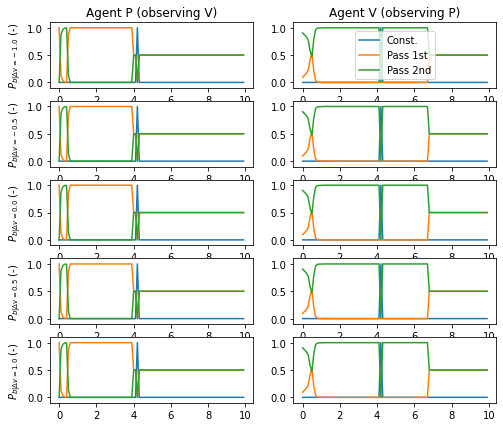

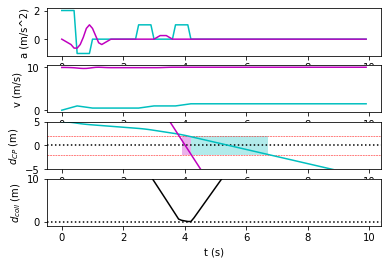

In [18]:
optional_assumptions = get_assumptions_dict(
        default_value = False, oVA = AFF_VAL_FCN, oBEo = False, oBEv = True, oAI = False, oEA = False)

run_baseline_kinematics(plot_beh_probs = True)

### Baseline kinematics, model with observation-based behaviour estimation

Finally, enabling `oBEo` yields the same results as in the 2021-06-21 simulation with `oBEao` enabled:

C:\GITHUB\COMMOTIONSFramework\sc_scenario.py:200: UserWarning: ****** Setting initial value of i_CONSTANT behaviour activation to arbitrary high value.
  warnings.warn('****** Setting initial value of i_CONSTANT behaviour activation to arbitrary high value.')


Initial car distance 40 m:


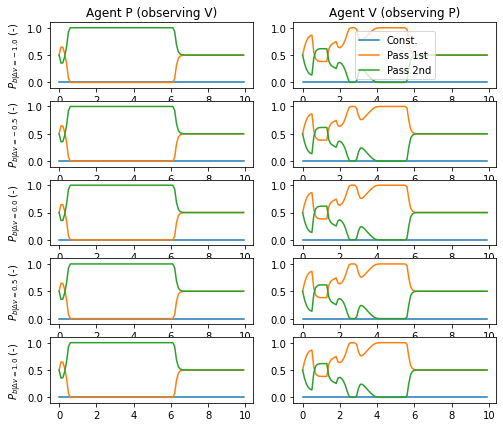

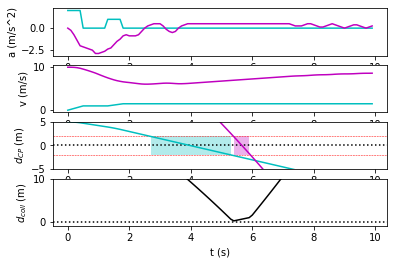

In [19]:
optional_assumptions = get_assumptions_dict(
        default_value = False, oVA = AFF_VAL_FCN, oBEo = True, oBEv = False, oAI = False, oEA = False)

run_baseline_kinematics(plot_beh_probs = True)